# Classificador de Raças de Cães

## Rede Neural Convolucional

UFFS - Universidade Federal da Fronteira Sul

Alunos: Murillo André Maleski, Rodrigo Almeida Costa, Lucas Percisi, Bruno Ribeiro

Ciência da Computação, 7ª Fase - Noturno

---

Este trabalho faz o reconhecimento de raças de cães a partir de imagens. Utiliza a rede pré-treinada ResNet50, cuja estrutura pode ser vista aqui:

http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006

---

### Carregar recursos ResNet50

Importar os recursos de treino, teste e validação da rede pré-treinada ResNet50.

In [1]:
import numpy as np

bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
train_resnet = bottleneck_features['train']
valid_resnet = bottleneck_features['valid']
test_resnet = bottleneck_features['test']
print(bottleneck_features)

### Montar a estrutura da Rede Neural Convolucional

Montar a estrutura da CNN, aproveitando os recursos pré-treinados pela ResNet50.

In [2]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense, Activation

dog = Sequential()
dog.add(GlobalAveragePooling2D(input_shape=train_resnet.shape[1:]))
dog.add(Dense(133, activation='softmax'))

#Imprimir estrutura
dog.summary()

#Carregar pesos treinados para os neurônios
dog.load_weights('rede_treinada/network_weights_model.hdf5')

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               272517    
Total params: 272,517.0
Trainable params: 272,517.0
Non-trainable params: 0.0
_________________________________________________________________


### Função para converter Imagem em Tensor

Criar uma função para converter a imagem de entrada em um Tensor 4D.

In [3]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # Carrega imagem RGB como tipo PIL.Image.Image
    img = image.load_img(img_path, target_size=(224, 224))
    # Converte o tipo PIL.Image.Image em um tensor 3D com tamanho (224, 224, 3)
    x = image.img_to_array(img)
    # Converte tensor 3D em um 4D com tamnho (1, 224, 224, 3) e retorna o tensor 4D
    return np.expand_dims(x, axis=0)

### Algoritmo para detectar raças de cachorros

Carregar imagem de entrada dentro da rede neural treinada e mostrar como saída a raçã de cachorro correspondente.

In [4]:
from keras.preprocessing import image        
from extract_bottleneck_features import *
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

def prever_cachorro(img_path):
    # Carregar imagem nos recursos extraidos da rede ResNet50
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))

    # Obter vetor de raças reconhecidas pela rede
    predicted_vector = dog.predict(bottleneck_feature)
    
    # Retornar raça encontrada e a probabilidade de acerto
    return dog_names[np.argmax(predicted_vector)], predicted_vector[0][np.argmax(predicted_vector)]

def reconhecer(img_path):
    # Carregar imagem
    img= mpimg.imread(img_path)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    
    result = prever_cachorro(img_path)
    
    print("Raça do cachorro é: ", (result[0]), " com ", (result[1]*100), "%")

---

### Testar algoritmo

Raça do cachorro é:  Flat-coated_retriever  com  99.78781938552856 %
Raça do cachorro é:  Canaan_dog  com  66.04812145233154 %
Raça do cachorro é:  Entlebucher_mountain_dog  com  92.37734079360962 %
Raça do cachorro é:  Labrador_retriever  com  82.1457028388977 %
Raça do cachorro é:  German_shepherd_dog  com  99.83769655227661 %
Raça do cachorro é:  Poodle  com  98.8186776638031 %
Raça do cachorro é:  Poodle  com  84.33763980865479 %
Raça do cachorro é:  Bullmastiff  com  33.90096724033356 %
Raça do cachorro é:  Labrador_retriever  com  88.5076105594635 %
Raça do cachorro é:  Cardigan_welsh_corgi  com  39.06921446323395 %
Raça do cachorro é:  Australian_cattle_dog  com  55.93694448471069 %


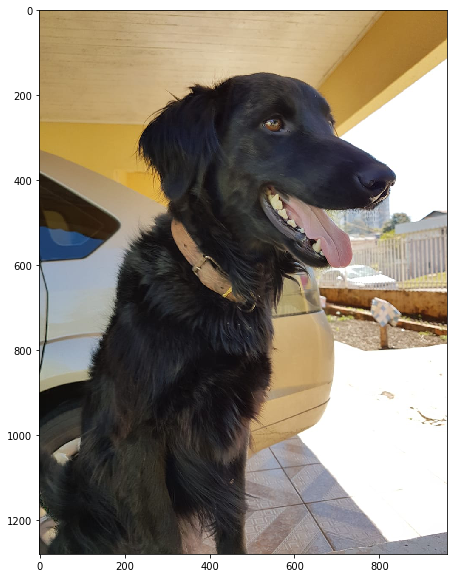

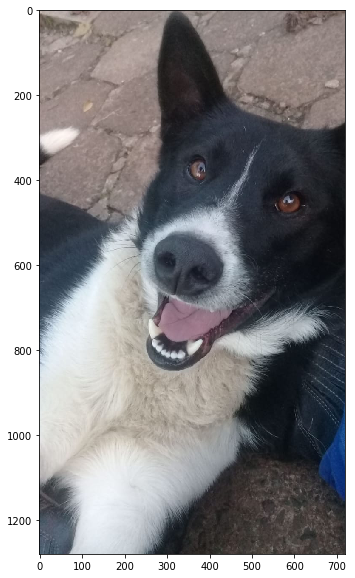

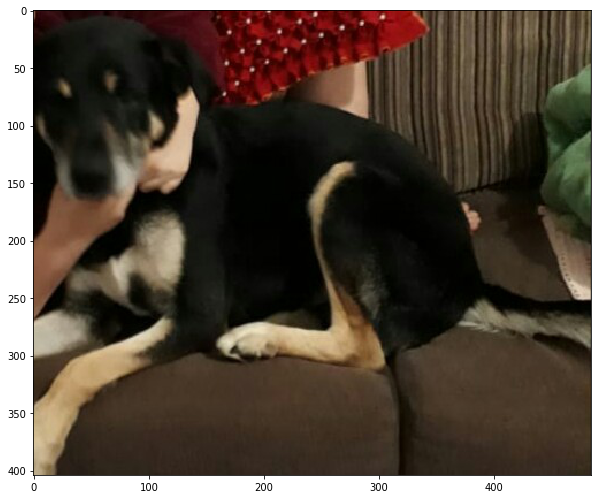

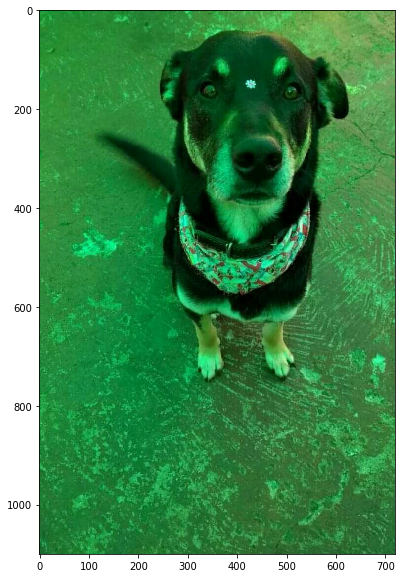

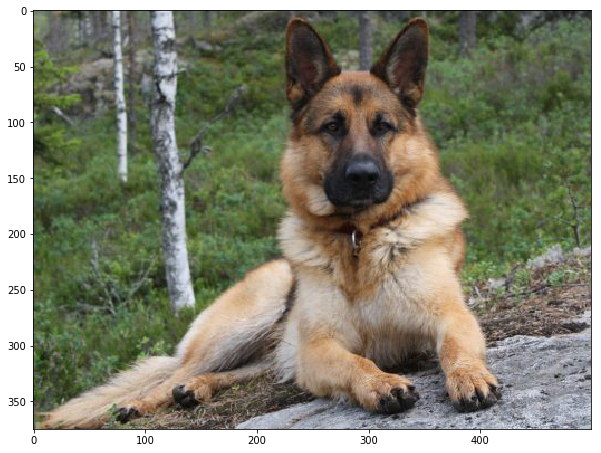

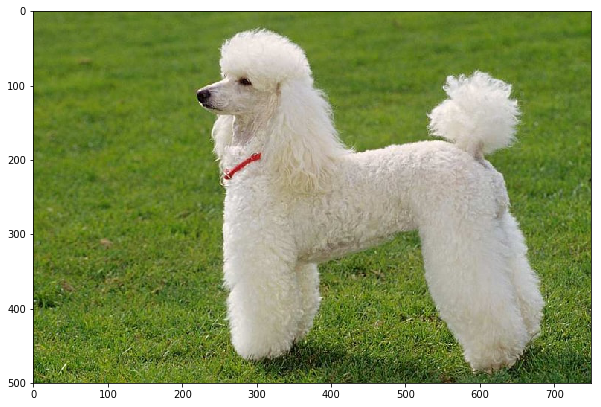

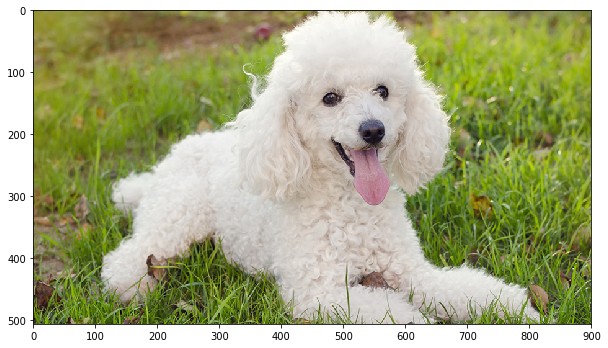

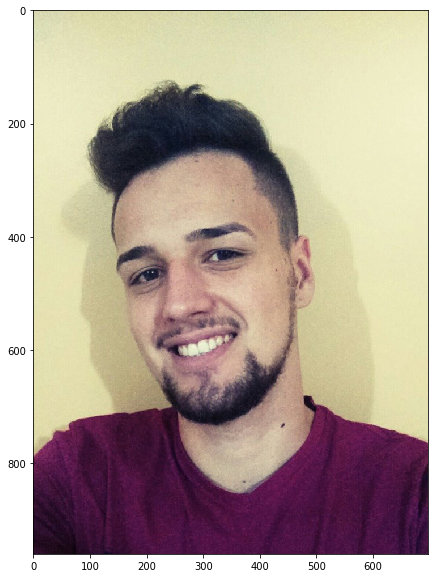

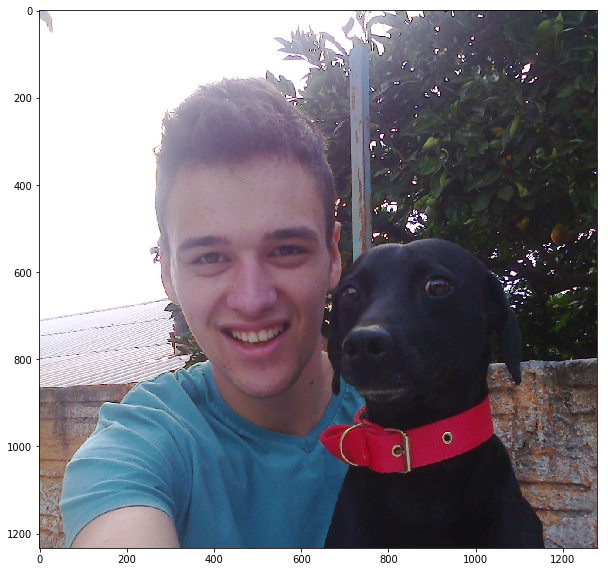

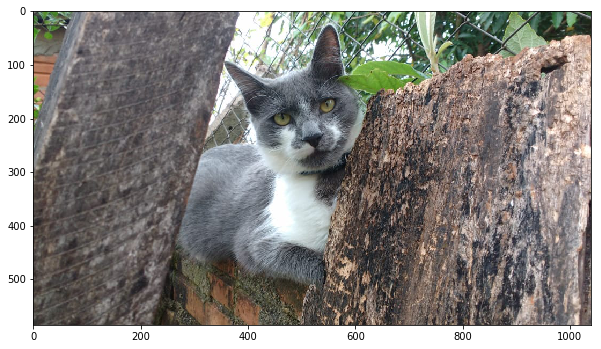

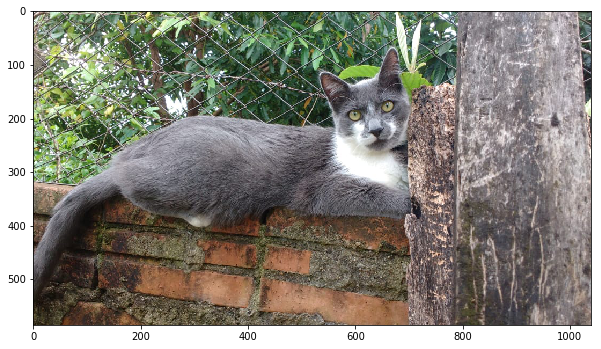

In [5]:
from glob import glob

# Carregar lista de nomes das raças de cães
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

for infile in sorted(glob("test_images/*")):
     reconhecer(infile)